## Data Processing

In [97]:
## Import in necessary modules
import pandas as pd
import ast 
import matplotlib.pyplot as plt
import seaborn as sns

In [98]:
## Look at the first 5 rows of the dataset
df = pd.read_csv("steam_games.csv")
df.head(5)

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,about_the_game,short_description,reviews,...,average_playtime_forever,average_playtime_2weeks,median_playtime_forever,median_playtime_2weeks,peak_ccu,tags,pct_pos_total,num_reviews_total,pct_pos_recent,num_reviews_recent
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...","For over two decades, Counter-Strike has offer...",NaN,...,29018,753,6078,352,1362469,"{'FPS': 90076, 'Shooter': 64786, 'Multiplayer'...",87,8071426,80,56072
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...","LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",Play PUBG: BATTLEGROUNDS for free. Land on str...,NaN,...,0,0,0,0,590582,"{'Survival': 14611, 'Shooter': 12477, 'Battle ...",58,2365012,68,19517
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...","The most-played game on Steam. Every day, mill...","Every day, millions of players worldwide enter...",“A modern multiplayer masterpiece.” 9.5/10 – D...,...,35557,1327,1163,977,668192,"{'Free to Play': 59559, 'MOBA': 19966, 'Multip...",81,2247365,71,23832
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...","When a young street hustler, a retired bank ro...",Grand Theft Auto V for PC offers players the o...,NaN,...,12898,590,6910,235,133571,"{'Open World': 31998, 'Action': 23177, 'Multip...",87,1643791,92,16181
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,“One of the best first-person shooters ever ma...,"Tom Clancy's Rainbow Six® Siege is an elite, t...",NaN,...,16213,578,3016,331,68162,"{'FPS': 9689, 'PvP': 9073, 'e-sports': 9026, '...",85,1091695,77,10566


In [99]:
## Number of columns and rows in the dataset
df.shape

(83646, 46)

In [100]:
## Check the general information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83646 entries, 0 to 83645
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   AppID                     83646 non-null  int64  
 1   name                      83643 non-null  object 
 2   release_date              83646 non-null  object 
 3   required_age              83646 non-null  int64  
 4   price                     83646 non-null  float64
 5   dlc_count                 83646 non-null  int64  
 6   detailed_description      83480 non-null  object 
 7   about_the_game            83458 non-null  object 
 8   short_description         83537 non-null  object 
 9   reviews                   10283 non-null  object 
 10  header_image              83646 non-null  object 
 11  website                   39760 non-null  object 
 12  support_url               42081 non-null  object 
 13  support_email             73067 non-null  object 
 14  window

In [101]:
## Check the number of rows that have a NaN value in respective columns
df.isnull().sum()

AppID                           0
name                            3
release_date                    0
required_age                    0
price                           0
dlc_count                       0
detailed_description          166
about_the_game                188
short_description             109
reviews                     73363
header_image                    0
website                     43886
support_url                 41565
support_email               10579
windows                         0
mac                             0
linux                           0
metacritic_score                0
metacritic_url              79706
achievements                    0
recommendations                 0
notes                       69437
supported_languages             0
full_audio_languages            0
packages                        0
developers                      0
publishers                      0
categories                      0
genres                          0
screenshots   

In [102]:
## Here are the features that we will be using and their dtypes
features = ['AppID', 'name', 'release_date', 'required_age', 'price', 'dlc_count', 'detailed_description',
            'website', 'support_url', 'support_email', 'windows', 'mac',
            'linux', 'achievements', 'supported_languages', 
            'full_audio_languages', 'packages', 'publishers', 'categories', 
            'genres', 'tags',]
df[features].dtypes

AppID                     int64
name                     object
release_date             object
required_age              int64
price                   float64
dlc_count                 int64
detailed_description     object
website                  object
support_url              object
support_email            object
windows                    bool
mac                        bool
linux                      bool
achievements              int64
supported_languages      object
full_audio_languages     object
packages                 object
publishers               object
categories               object
genres                   object
tags                     object
dtype: object

In [103]:
## Remove columns that will not have any impact, as well as the 3 rows with no "name"
df = df[features]
df['name'] = df['name'].fillna('X')
df_cleaned = df[df['name'] != 'X']

## Make "website", "support_url" and "support_email" binary columns depending whether they exist or not
columns_with_nan = ['website', 'support_url', 'support_email']
df_cleaned.loc[:, columns_with_nan] = df_cleaned[columns_with_nan].notna().astype(int)

In [104]:
## Verify that the new dataset has no NULL values in all columns and rows
df_cleaned.isnull().sum()

AppID                     0
name                      0
release_date              0
required_age              0
price                     0
dlc_count                 0
detailed_description    164
website                   0
support_url               0
support_email             0
windows                   0
mac                       0
linux                     0
achievements              0
supported_languages       0
full_audio_languages      0
packages                  0
publishers                0
categories                0
genres                    0
tags                      0
dtype: int64

In [105]:
## Number of columns and rows in the new cleaned dataset
df_cleaned.shape

(83643, 21)

In [106]:
## Convert release_date to datetime
df_cleaned = df_cleaned.copy()
df_cleaned['release_date'] = pd.to_datetime(df_cleaned['release_date'], format='%Y-%m-%d')
    
## Define a function to process the tags into a list
def process_tags(row):
    if isinstance(row['tags'], str):
        try:
            tags_dict = ast.literal_eval(row['tags'])  
            if isinstance(tags_dict, dict):  
                tags_list = list(tags_dict.keys()) 
            else:
                tags_list = [] 
        except (ValueError, SyntaxError):
            tags_list = [] 
    else:
        tags_list = [] 

    return tags_list

    ## To combine the categories and tags columns
    # if isinstance(row['categories'], list):
    #     categories_list = row['categories']
    # else:
    #     categories_list = [] 

    # combined = list(set(categories_list + tags_list))
    # return combined
    
df_cleaned['tags'] = df_cleaned.apply(process_tags, axis=1)

## Tokenize columns: convert each entry to the count of unique tokens
tokenize_columns = ['supported_languages', 'full_audio_languages', 'publishers', 'genres', 'packages', 'categories']
for col in tokenize_columns:
    df_cleaned[col] = df_cleaned[col].apply(lambda x: len(set(x.split(','))) if isinstance(x, str) else len(set(x)) if isinstance(x, list) else 0)
df_cleaned['tags'] = df_cleaned['tags'].apply(lambda x: len(set(x)) if isinstance(x, list) else 0)

df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83643 entries, 0 to 83645
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   AppID                 83643 non-null  int64         
 1   name                  83643 non-null  object        
 2   release_date          83643 non-null  datetime64[ns]
 3   required_age          83643 non-null  int64         
 4   price                 83643 non-null  float64       
 5   dlc_count             83643 non-null  int64         
 6   detailed_description  83479 non-null  object        
 7   website               83643 non-null  object        
 8   support_url           83643 non-null  object        
 9   support_email         83643 non-null  object        
 10  windows               83643 non-null  bool          
 11  mac                   83643 non-null  bool          
 12  linux                 83643 non-null  bool          
 13  achievements         

In [107]:
df_cleaned.head(10)

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,website,support_url,support_email,...,mac,linux,achievements,supported_languages,full_audio_languages,packages,publishers,categories,genres,tags
0,730,Counter-Strike 2,2012-08-21,0,0.00,1,"For over two decades, Counter-Strike has offer...",1,0,0,...,False,True,1,28,2,6,1,10,2,20
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.00,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",1,1,0,...,False,False,37,17,1,1,2,6,4,20
2,570,Dota 2,2013-07-09,0,0.00,2,"The most-played game on Steam. Every day, mill...",1,0,0,...,True,True,0,28,4,4,1,7,3,20
3,271590,Grand Theft Auto V,2015-04-13,17,0.00,1,"When a young street hustler, a retired bank ro...",1,1,0,...,False,False,77,13,2,18,1,11,2,20
4,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,1,1,0,...,False,False,0,16,9,10,1,11,1,20
5,440,Team Fortress 2,2007-10-10,0,0.00,1,"""The most fun you can have online"" - PC Gamer ...",1,1,0,...,True,True,520,26,2,6,1,14,2,20
6,105600,Terraria,2011-05-16,0,9.99,2,"Dig, Fight, Explore, Build: The very world is ...",1,1,1,...,True,True,115,9,1,7,1,14,4,20
7,4000,Garry's Mod,2006-11-29,0,9.99,0,Garry's Mod is a physics sandbox. There aren't...,1,1,0,...,True,True,29,25,2,6,1,19,3,20
8,252490,Rust,2018-02-08,17,39.99,4,The only aim in Rust is to survive. Everything...,1,1,0,...,True,False,92,25,14,4,1,14,5,20
9,1172470,Apex Legends™,2020-11-04,0,0.00,0,Apex Legends: Upheaval About the Game Conquer ...,1,1,0,...,False,False,12,14,11,1,1,9,3,20


## Data Exploration
### Textual Data Analysis

In [108]:
## Find the most expensive game and its information
most_expensive_id = df_cleaned['price'].idxmax()
most_expensive_game = df_cleaned.loc[most_expensive_id]
most_expensive_game

AppID                                                             2499620
name                                                    The Leverage Game
release_date                                          2023-08-25 00:00:00
required_age                                                            0
price                                                              999.98
dlc_count                                                               0
detailed_description    The Leverage Game is a board game in which pla...
website                                                                 1
support_url                                                             1
support_email                                                           1
windows                                                              True
mac                                                                 False
linux                                                               False
achievements                          

In [109]:
## Find the cheapest PAID game and its information
cheapest_id = df_cleaned[df_cleaned['price'] > 0]['price'].idxmin()
cheapest_game = df_cleaned.loc[cheapest_id]
cheapest_game

AppID                                                             2181930
name                                     DR LIVESEY ROM AND DEATH EDITION
release_date                                          2023-02-13 00:00:00
required_age                                                            0
price                                                                0.49
dlc_count                                                               0
detailed_description    BASED / About the Game DR LIVESEY ROM AND DEAT...
website                                                                 0
support_url                                                             0
support_email                                                           1
windows                                                              True
mac                                                                 False
linux                                                               False
achievements                          

In [110]:
## Find all the (supposedly) free games
## Note that a few games such as Grand Theft Auto V is paid, but due to how the store page is set up in Steam, they show up as free incorrectly
df_free = df_cleaned.loc[df_cleaned["price"] == 0].reset_index()
df_free = df_free.drop(columns="index")
df_free

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,website,support_url,support_email,...,mac,linux,achievements,supported_languages,full_audio_languages,packages,publishers,categories,genres,tags
0,730,Counter-Strike 2,2012-08-21,0,0.0,1,"For over two decades, Counter-Strike has offer...",1,0,0,...,False,True,1,28,2,6,1,10,2,20
1,578080,PUBG: BATTLEGROUNDS,2017-12-21,0,0.0,0,"LAND, LOOT, SURVIVE! Play PUBG: BATTLEGROUNDS ...",1,1,0,...,False,False,37,17,1,1,2,6,4,20
2,570,Dota 2,2013-07-09,0,0.0,2,"The most-played game on Steam. Every day, mill...",1,0,0,...,True,True,0,28,4,4,1,7,3,20
3,271590,Grand Theft Auto V,2015-04-13,17,0.0,1,"When a young street hustler, a retired bank ro...",1,1,0,...,False,False,77,13,2,18,1,11,2,20
4,440,Team Fortress 2,2007-10-10,0,0.0,1,"""The most fun you can have online"" - PC Gamer ...",1,1,0,...,True,True,520,26,2,6,1,14,2,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12768,1565110,临 第一部分“假作真”篇,2023-07-02,0,0.0,1,"Game Introduction In a world without humans, a...",1,0,1,...,False,False,0,1,1,1,1,1,2,0
12769,1450000,Safe Squares,2020-11-20,0,0.0,0,Safe Squares is a chess-based puzzle game desi...,0,0,1,...,False,False,0,1,1,1,1,2,1,11
12770,2330140,Run On Home,2023-03-21,17,0.0,0,First One! This is my first solo published gam...,0,1,1,...,False,False,4,1,1,1,1,2,1,0
12771,1175690,MyStar,2019-11-12,0,0.0,0,Please use Xbox controller to play this game. ...,0,0,1,...,False,False,0,1,1,1,1,2,3,3


In [111]:
## Find all the (supposedly) paid games
df_paid = df_cleaned.loc[df_cleaned["price"] > 0].reset_index()
df_paid = df_paid.drop(columns="index")
df_paid

,AppID,name,release_date,required_age,price,dlc_count,detailed_description,website,support_url,support_email,...,mac,linux,achievements,supported_languages,full_audio_languages,packages,publishers,categories,genres,tags
0,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,17,19.99,9,Edition Comparison Ultimate Edition The Tom Cl...,1,1,0,...,False,False,0,16,9,10,1,11,1,20
1,105600,Terraria,2011-05-16,0,9.99,2,"Dig, Fight, Explore, Build: The very world is ...",1,1,1,...,True,True,115,9,1,7,1,14,4,20
2,4000,Garry's Mod,2006-11-29,0,9.99,0,Garry's Mod is a physics sandbox. There aren't...,1,1,0,...,True,True,29,25,2,6,1,19,3,20
3,252490,Rust,2018-02-08,17,39.99,4,The only aim in Rust is to survive. Everything...,1,1,0,...,True,False,92,25,14,4,1,14,5,20
4,292030,The Witcher® 3: Wild Hunt,2015-05-18,0,9.99,22,Special Offer About the Game THE MOST AWARDED ...,1,1,1,...,False,False,78,16,9,8,1,8,1,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70865,1745960,Circuit Breaker,2021-10-21,0,4.99,1,Circuit Breaker is a turn-based strategy game ...,0,0,1,...,False,False,0,1,1,4,1,2,3,17
70866,1888920,Chess vs Chat,2022-08-09,0,3.99,0,Chess Vs Chat allows streamers to host chess m...,0,0,1,...,False,False,10,1,1,4,1,9,2,8
70867,2166420,Orbtangle,2022-10-28,0,1.99,0,Orbtangle is a simplistic puzzle game which re...,0,1,1,...,False,False,22,1,1,4,1,3,1,17
70868,1456260,Flashlight,2021-10-25,0,2.99,0,Play with Friends Play with or against your fr...,0,0,1,...,True,False,32,1,1,4,1,11,3,20


In [112]:
## Display basic statistics for numerical features
df_cleaned[['required_age', 'price', 'dlc_count', 'achievements']].describe()

,required_age,price,dlc_count,achievements
count,83643.000000,83643.000000,83643.000000,83643.000000
mean,0.276413,7.492383,0.580563,20.703478
std,2.119872,13.094663,14.179414,167.842186
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.990000,0.000000,0.000000
50%,0.000000,4.990000,0.000000,4.000000
75%,0.000000,9.990000,0.000000,20.000000
max,21.000000,999.980000,3165.000000,9821.000000


### Graphical Data Analysis

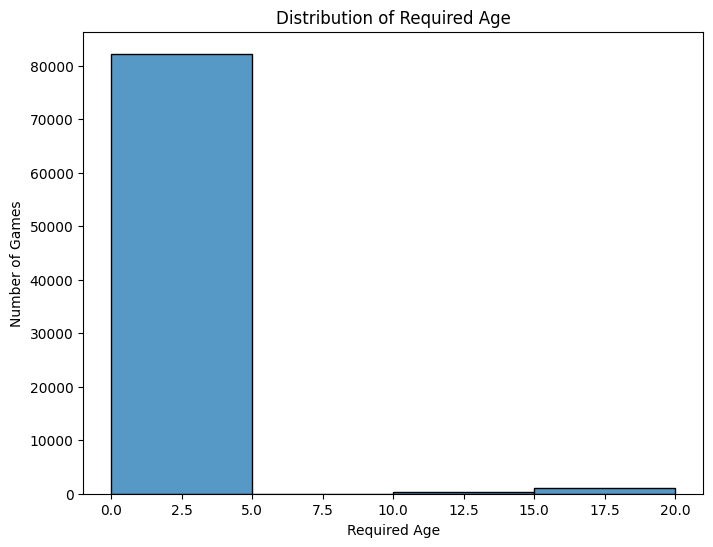

In [119]:
## Check the required_age distribution
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['required_age'], bins=range(0, 21, 5), kde=False)
plt.title('Distribution of Required Age')
plt.xlabel('Required Age')
plt.ylabel('Number of Games')
plt.show()

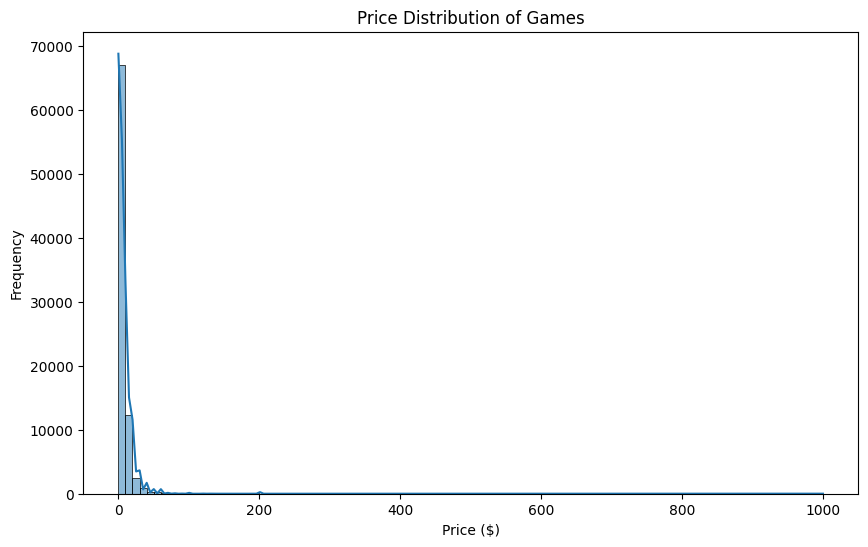

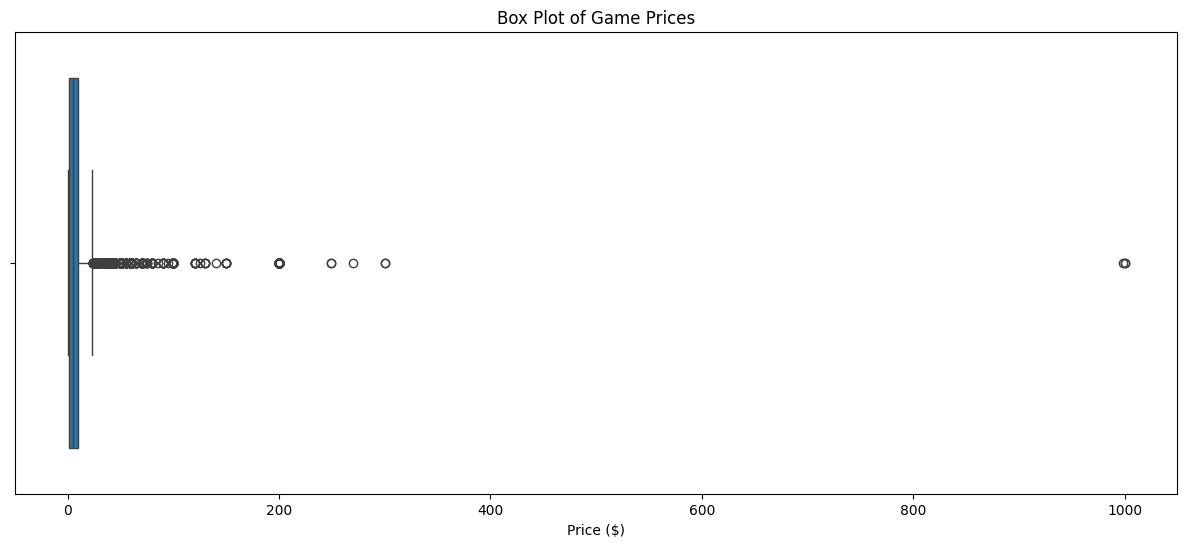

In [137]:
## Check the price distribution
plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['price'], bins=100, kde=True)
plt.title('Price Distribution of Games')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

## Box plot to check for outliers in price
plt.figure(figsize=(15, 6))
sns.boxplot(x=df_cleaned['price'])
plt.title('Box Plot of Game Prices')
plt.xlabel('Price ($)')
plt.show()

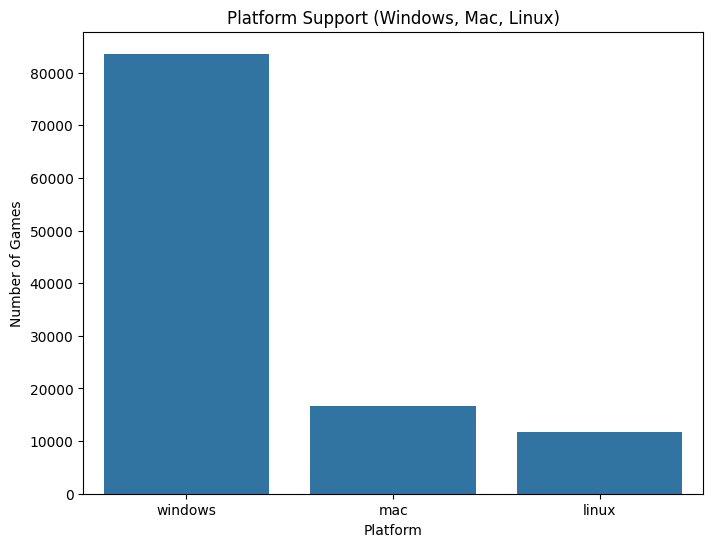

In [130]:
## Check the proportion of games that support each platform
platform_support = df_cleaned[['windows', 'mac', 'linux']].sum()

plt.figure(figsize=(8, 6))
sns.barplot(x=platform_support.index, y=platform_support.values)
plt.title('Platform Support (Windows, Mac, Linux)')
plt.xlabel('Platform')
plt.ylabel('Number of Games')
plt.show()

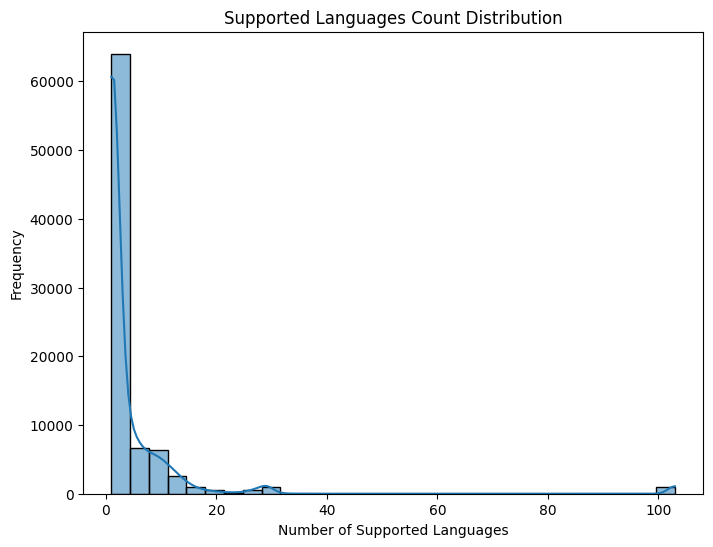

In [135]:
## Check the count distribution of supported languages for the games
plt.figure(figsize=(8, 6))
sns.histplot(df_cleaned['supported_languages'], bins=30, kde=True)
plt.title('Supported Languages Count Distribution')
plt.xlabel('Number of Supported Languages')
plt.ylabel('Frequency')
plt.show()

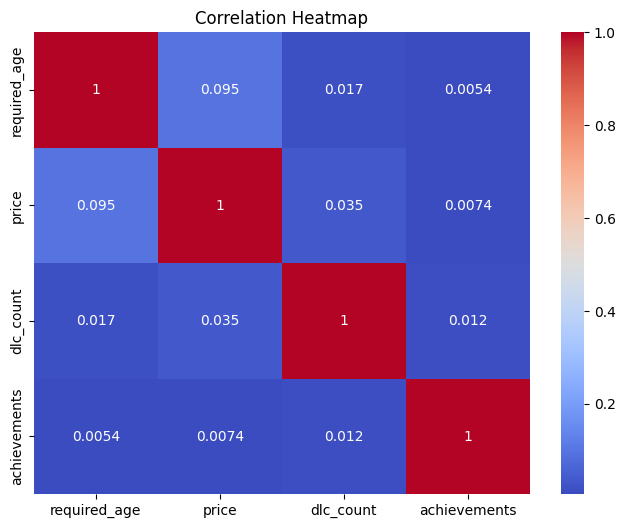

In [140]:
## Correlation heatmap for selected numerical features
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[['required_age', 'price', 'dlc_count', 'achievements']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()